## 기술적 지표 구현

## 기술적 지표

 트레이딩을 위해서는 과거 주가의 움직임이나 패턴을 통해 향후 주식 가격의 등락을 판단하는 '기술적 분석'에 의존.  기술적 지표는 추세의 방향이나 강도, 혹은 가격의 움직임의 속도와 정도를 측정. 기술적 지표를 이용한 트레이딩 전략은 크게 '추세추종전략'과 '평균회귀전략'으로 나눌 수 있다. 

1. 추세추종 전략: 이동평균 등의 지표가 사용
2. 평균회귀 전략: RSI, 볼린저밴드 등의 지표가 사용



### 이동평균

장단기 이동평균은 현재의 추세나 추세 역전, 혹은 저항 수준을 확인할 때 사용. 흔히 이동평균이 상승하는 상황에서 주가가 그보다 위에 있다면 상승 신호로 판단. 반대로 이동평균이 하락하는 상황에서 주가가 그보다 아래에 있다면 하락 신호로 여김.

골든크로스란 단기 이동평균선이 중장기 이동평균선을 아래에서 위로 뚫고 올라가는 현상으로써 강세신호를 나타내며, 데드크로스는 단기 이동평균선이 중장기 이동평균선을 위에서 아래로 뚫고 내려가는 현상으로 약세신호를 나타냄.


이동평균을 계산하는 방법은 가격 데이터에 가중치를 얼마나 두냐에 따라 여러가지 방법이 존재하지만, 크게 단순 이동평균과 지수 이동평균이 사용된다.

- 단순 이동평균(SMA, Simple Moving Average): 단순히 주어진 기간 동안의 종가의 평균

- 지수 이동평균(EMA, Exponential Moving Average): 최근 데이터가 더욱 중요할 수 있으며, 
    지수 이동평균은 이를 반영하여 각 데이터에 가중치를 다르게 부여한 후 평균을 구한다.

In [ ]:
import warnings   # 경고문장 무사
warnings.filterwarnings(action='ignore')

### 1.  상대강도지수(RSI)
RSI는 일정기간 동안 주가의 상승폭과 하락폭의 크기를 비교해 상승과 하락의 상대적인 강도를 나타낸 지표.

U(Up): 가격이 상승한 날의 상승폭
D(Down): 가격이 하락한 날의 하락폭
AU(Average Up)과 AD(Average Down): U값과 D값의 평균을 각각 구함
RS(Relative Strenth): AU/AD를 통해 상대강도를 구함
RS 값이 크다는 것은 일정기간 동안 상승한 폭이 하락한 폭보다 크다는 것을 의미하며, RSI는 0에서 100 범위 내에서 움직인다. 일반적으로 RSI가 70 이상일 경우 과매수 구간으로써 매도할 때로, 30 이하일 경우 과매도 구간으로써 매수해야 할 때로 판단. 다시말해 지나친 상승 뒤에는 하락할 것을, 지나친 하락 뒤에는 상승할 것을 기대.

In [5]:
# RSI ( relative strength index,) 지표 구하기 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf
stock_data =yf.download('005930.KS')  # S&P500
df=stock_data.tail(500)

# 가격변화분 계산

delta = df['Close'].diff()


# 이동평균 기간 설정 (통상 14~15일)

period = 14

# 기간별 상승일 상승분 평균과 하락일 하락분 평균 구하기

gain =  delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(period).mean()
avg_loss = loss.rolling(period).mean()

#  상대강도(Relative Strength (RS)) 구하기 

rs = avg_gain / avg_loss

# 상대강도지수(Relative Strength Index (RSI)) 구하기

rsi = 100 - (100 / (1 + rs))


#  df에  RSI 추가

df['RSI'] = rsi


[*********************100%***********************]  1 of 1 completed
C:\Users\wonee\AppData\Local\Temp\ipykernel_5684\1740685454.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = rsi


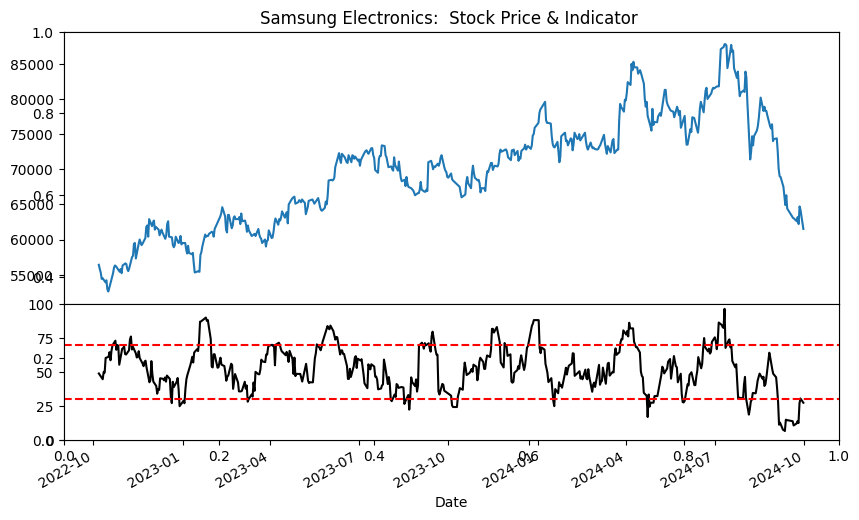

In [11]:
import matplotlib.pyplot as gridspec

fig = plt.subplots(figsize=(10, 6), sharex=True)
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 1]) # 그림을 2개로 나눈다.

# 주가 그래프

ax1 = plt.subplot(gs[0])
ax1 = df['Close'].plot()
ax1.set_xlabel('')
ax1.axes.xaxis.set_ticks([])
plt.title('Samsung Electronics:  Stock Price & Indicator ')

# RSI 표현하기
ax2 = plt.subplot(gs[1])
ax2 = df['RSI'].plot(color='black', ylim=[0, 100])
ax2.axhline(y=70, color='r', linestyle='--')
ax2.axhline(y=30, color='r', linestyle='--')
ax2.set_xlabel
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

## 2. 볼린저밴드

볼린저밴드는 이동평균선을 중심으로 일정 표준편차를 상한선과 하한선으로 설정한 밴드다. 

- 중심 밴드: n 기간 동안의 이동평균
- 상단 밴드: 중심 밴드 기준 k 표준편차 위
- 하단 밴드: 중심 밴드 기준 k 표준편차 아래

주가의 움직임이 정규분포를 따른다는 가정에 기초. 
정규분포에서는 데이터가 1 표준편차 내에 있을 확률이 약 68%, 
2 표준편차 내에 있을 확률이 약 95%, 3 표준편차 내에 있을 확률이 약 99%다.
주가가 정규분포를 따른다면, 주가의 움직임은 상한선과 하한선으로 구성된 
밴드 내에서만 움직일 확률이 높다. 따라서 주가가 상한선 위에 있다는 것은 
과매수 상태이므로 하락할 가능성이, 하단선 아래에 있다는 것은 과매도 상태이므로
상승할 가능성이 높다고 본다.


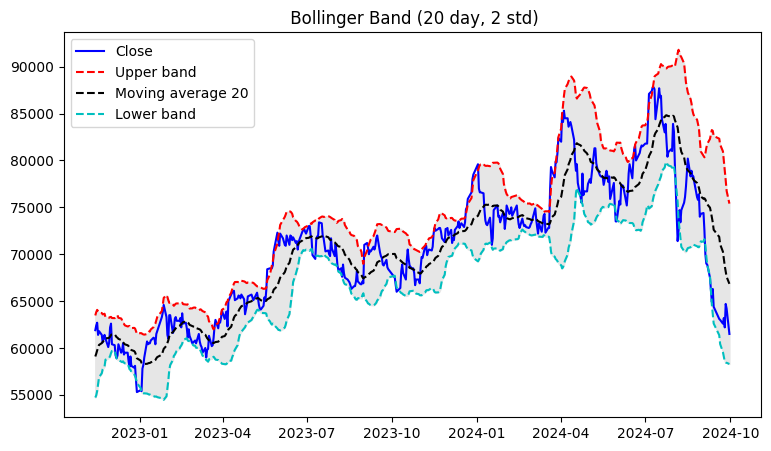

In [14]:
# Bollinger Band 지표 구현하기


df['MA20'] = df['Close'].rolling(window= 20).mean()  #  이동평균 기간
df['stddev'] = df['Close'].rolling(window= 20).std() #  표준편차
df['upper'] = df['MA20'] + (df['stddev'] * 2)   #  이동평균 + 2*표준편차
df['lower'] = df['MA20'] - (df['stddev'] * 2)   #  이동평균 - 2*표준편차

df = df[19:]  #  20번째 행부터 적용
plt.figure(figsize=(9, 5))
plt.plot(df.index, df['Close'], color='#0000ff', label='Close')    # 파란색  실선
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')       #  상단 실선
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')   # 중심선
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')       # 하단선
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')  #  밴드사이에 색을 채운다 (회색) 
plt.legend(loc='best')
plt.title(' Bollinger Band (20 day, 2 std)')
plt.show()



### 3. MACD  ( Moving Average Convergence Divergence)

뉴욕의 애널리스트이자 펀드매니저인 제럴드 아펠이 세가지 지수이동평균선을 이용해 이동평균 수렴확산 지표를 개발

MACD 차트는 MACD선(실선)과 신호선(점선)인데 두 선의 교차점에서 매매신호 발생

MACD선은 종가의 12일 지수이동평균에서 26일 지수이동평균선을 뺀 것으로 가격변화에 상대적으로 빠르게 반응한다.

신호선은 MACD선의 9일 지수이동평균을 구한 선으로 MACD선을 평활화시킨 것이므로 가격변화에 상대적으로 늦게 반응한다.

1) MACD선이 신호선을 상향돌파 하는 것은 매수세가 시장을 주도한다고 판단하여 매수관점에서 대처한다.

   반대로 MACD선이 신호선을 하향돌파하면 매도관점에서 대응한다.
    
2) MACD 히스토그램(=MACD선-신호선)는  MACD보다도 매수/매도 상태를 잘 표현해준다.  단순히 매수와 매도 비중 뿐아니라
   
   강도의 추세를 보여주는 유용한 지표로 평가 받는다.

3) 매수 신호는 MACD히스토그램이 중심선 아래에 있고 기울기가 상향 반전하고 있을때 발생 
    (히스토그램과 가격의 다이버전스는 드물게 나타나지만 강력한 신호로 간주)


In [21]:
# ! pip install mpl_finance 

[*********************100%***********************]  1 of 1 completed


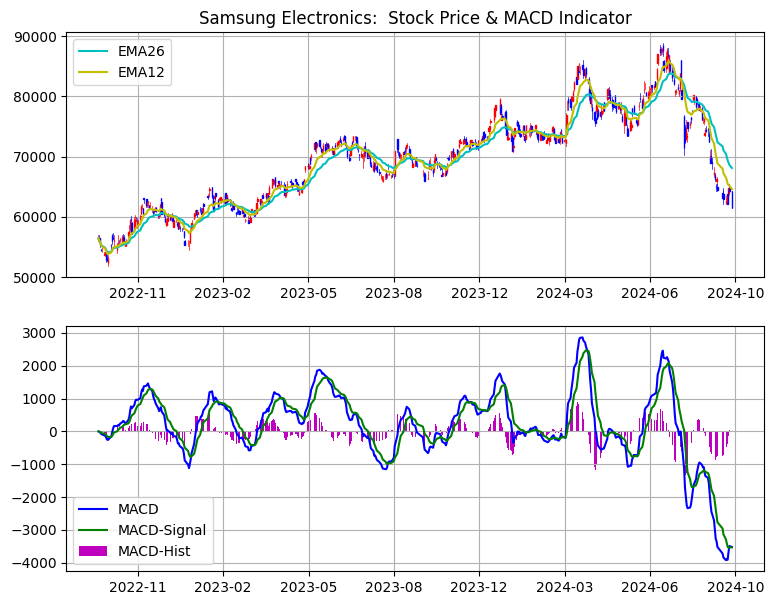

In [35]:
import datetime
from mpl_finance import candlestick_ohlc  # 캔들차트구현
import matplotlib.dates as mdates

stock_data =yf.download('005930.KS')  # S&P500
df=stock_data.tail(500)


ema12 = df.Close.ewm(span=12).mean()  # 12일 지수이평
ema26 = df.Close.ewm(span=26).mean()  # 26일 지수이평
macd = ema12 - ema26                  # macd
signal = macd.ewm(span=9).mean()      # macd의 9일 지수이평
macdhist = macd - signal              # macd 히스토그램 

df = df.assign(ema26=ema26, ema12=ema12, macd=macd, signal=signal, macdhist=macdhist).dropna()  # assign : df에  새 열 할당

df['number'] = df.index.map(mdates.date2num)
ohlc = df[['number','Open','High','Low','Close']]  # ',

plt.figure(figsize=(9, 7))
p1 = plt.subplot(2, 1, 1)
plt.title('Samsung Electronics:  Stock Price & MACD Indicator')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup='red', 
    colordown='blue')  # 
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema26'], color='c', label='EMA26')
plt.plot(df.number, df['ema12'], color='y', label='EMA12')
plt.legend(loc='best')

p2 = plt.subplot(2, 1, 2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number, df['macdhist'], color='m', label='MACD-Hist')
plt.plot(df.number, df['macd'], color='b', label='MACD')
plt.plot(df.number, df['signal'], 'g-', label='MACD-Signal')
plt.legend(loc='best')
plt.show()


### pandas-ta 패키지

수식의 계산보다 패키지를 이용.  pandas-ta 패키지로 다양한 기술적 지표를 계산 가능
해당 패키지에 대한 자세한 내용은 공식 깃허브를 참조.

```
https://github.com/twopirllc/pandas-ta
```


In [36]:
import yfinance as yf
stock_data=yf.download('^GSPC')  # S&P500

stock_data=stock_data.tail(500)

[*********************100%***********************]  1 of 1 completed


In [37]:
# ! pip install pandas_ta 

C:\Users\wonee\AppData\Local\Temp\ipykernel_5684\4276456114.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_20']=ta.sma(stock_data['Close'],length=20)  # 20일 단순이동평균
C:\Users\wonee\AppData\Local\Temp\ipykernel_5684\4276456114.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_60']=ta.sma(stock_data['Close'],length=60)  # 60일 단순이동평균


<Axes: xlabel='Date'>

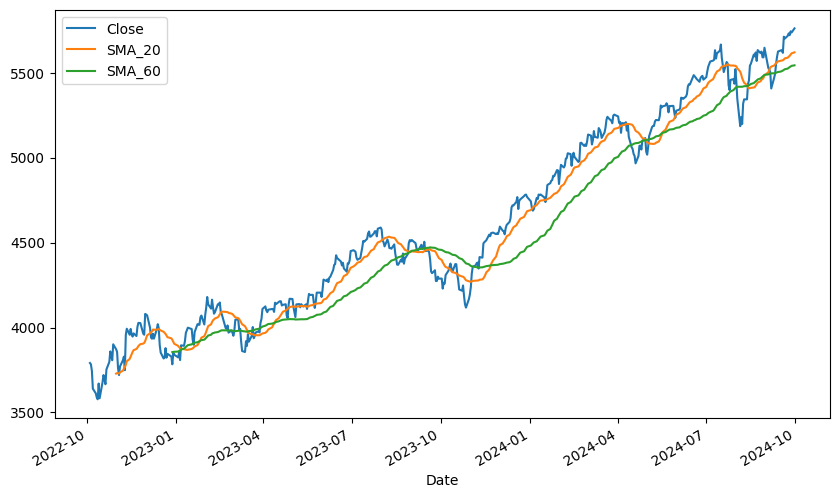

In [38]:
# 이동평균 


import pandas_ta as ta
import matplotlib.pyplot as plt

stock_data['SMA_20']=ta.sma(stock_data['Close'],length=20)  # 20일 단순이동평균
stock_data['SMA_60']=ta.sma(stock_data['Close'],length=60)  # 60일 단순이동평균

stock_data[['Close','SMA_20','SMA_60']].plot(figsize=(10,6))

C:\Users\wonee\AppData\Local\Temp\ipykernel_5684\2246319523.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['EMA_20']=ta.ema(stock_data['Close'],20)  # 60일 지수이동평균


<Axes: xlabel='Date'>

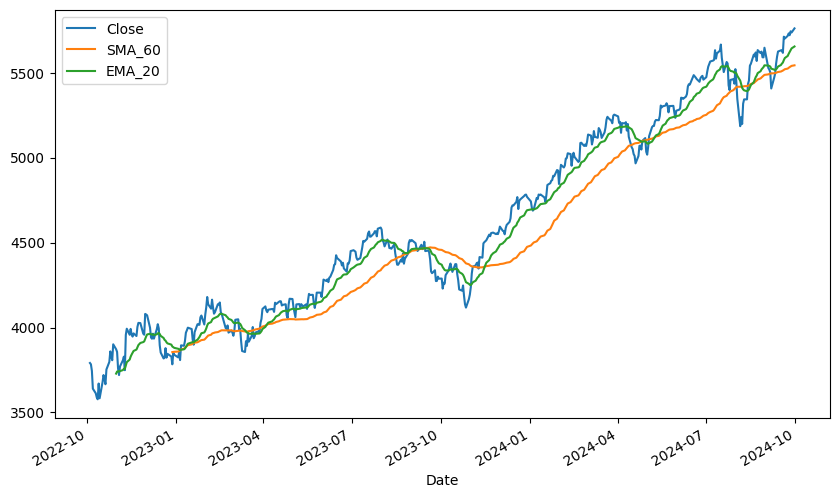

In [39]:
# 지수이동평균

'''
지수 이동평균이 최근 데이터에 더 많은 가중치를 부여하기에, 
단순 이동평균보다 주가의 움직임에 따라 더욱 민감하게 반응
'''

stock_data['EMA_20']=ta.ema(stock_data['Close'],20)  # 60일 지수이동평균
stock_data[['Close','SMA_60','EMA_20']].plot(figsize=(10,6))



### 상대강도지수(RSI)

RSI는 일정기간 동안 주가의 상승폭과 하락폭의 크기를 비교해 
상승과 하락의 상대적인 강도를 나타낸 지표.

1. U(Up): 가격이 상승한 날의 상승폭
2. D(Down): 가격이 하락한 날의 하락폭
3. AU(Average Up)과 AD(Average Down): U값과 D값의 평균을 각각 구함
4. RS(Relative Strenth): AU/AD를 통해 상대강도를 구함

RS 값이 크다는 것은 일정기간 동안 상승한 폭이 하락한 폭보다 크다는 것을 의미하며, 
RSI는 0에서 100 범위 내에서 움직인다.
일반적으로 RSI가 70 이상일 경우 과매수 구간으로써 매도할 때로,
30 이하일 경우 과매도 구간으로써 매수해야 할 때로 판단.
다시말해 지나친 상승 뒤에는 하락할 것을, 지나친 하락 뒤에는 상승할 것을 기대.









C:\Users\wonee\AppData\Local\Temp\ipykernel_5684\3242678036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['RSI_14'] = ta.rsi(stock_data['Close'], length=14)
C:\Users\wonee\AppData\Local\Temp\ipykernel_5684\3242678036.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['RSI_14'] = stock_data['RSI_14'].fillna(0)


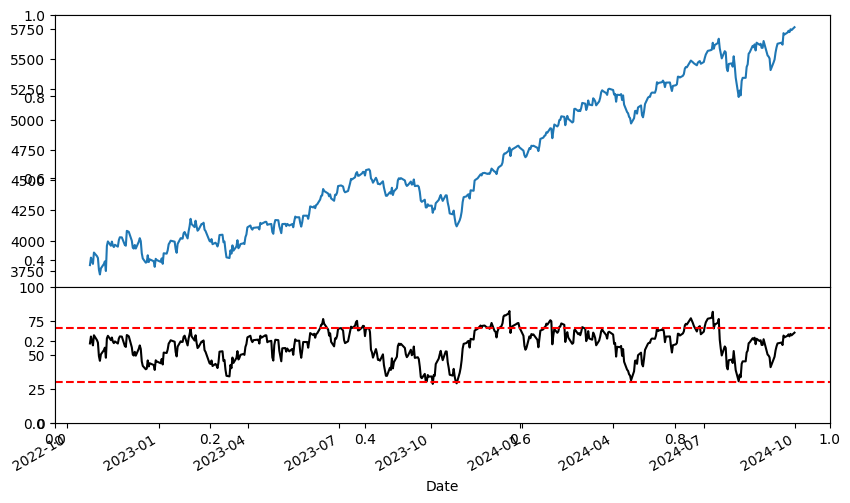

In [40]:
from matplotlib import gridspec

stock_data['RSI_14'] = ta.rsi(stock_data['Close'], length=14)
stock_data['RSI_14'] = stock_data['RSI_14'].fillna(0)

fig = plt.subplots(figsize=(10, 6), sharex=True)
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 1]) # 그림을 2개로 나눈다.

stock_data=stock_data[14:]

# 주가 그래프
ax1 = plt.subplot(gs[0])
ax1 = stock_data['Close'].plot()
ax1.set_xlabel('')
ax1.axes.xaxis.set_ticks([])

# RSI 표현하기
ax2 = plt.subplot(gs[1])
ax2 = stock_data['RSI_14'].plot(color='black', ylim=[0, 100])
ax2.axhline(y=70, color='r', linestyle='--')
ax2.axhline(y=30, color='r', linestyle='--')
ax2.set_xlabel
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

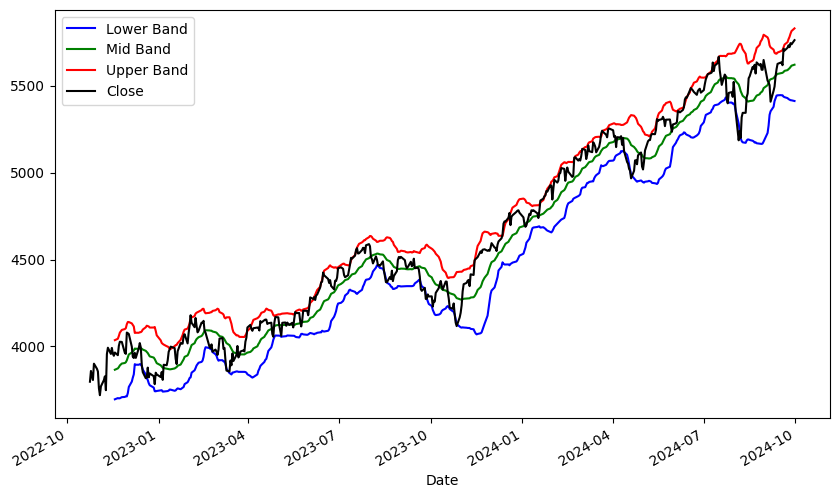

In [41]:
import pandas as pd

band = ta.bbands(stock_data["Close"], length=20, std=2)
bb = pd.concat([band[['BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0']], stock_data['Close']], axis = 1)
bb.columns = ['Lower Band', 'Mid Band', 'Upper Band', 'Close']
bb.plot(figsize=(10, 6),
        color={
            'Upper Band': 'red',
            'Lower Band': 'blue',
            'Mid Band': 'green',
            'Close': 'black'
        })
plt.show()

### 기술지표 백테스팅   (단기이평/장기이평 )

In [92]:
# 공매도 허용/ 수수료 고려

from dateutil.relativedelta import relativedelta

stock_data =yf.download('005930.KS')  # S&P500
dfs=stock_data.tail(1000)

[*********************100%***********************]  1 of 1 completed


In [100]:
df1= dfs['Close'].to_frame()  #:삼성전자

In [101]:
df1['SMA1'] = ta.sma(df1['Close'],length=8)    # 단기이동평균선

In [102]:
df1['SMA2'] = ta.sma(df1['Close'],length=60)   # 장기이동평균선

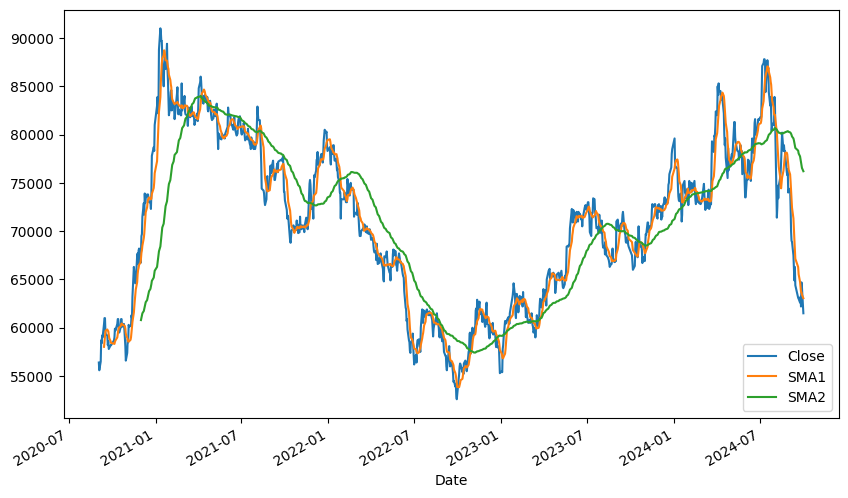

In [103]:
df1.plot(figsize=(10, 6));   # 시계열의 시각화 

In [104]:
df1['p'] = np.where(df1['SMA1'] > df1['SMA2'], 1, -1) # 포지션 값 도출 (+1,-1)

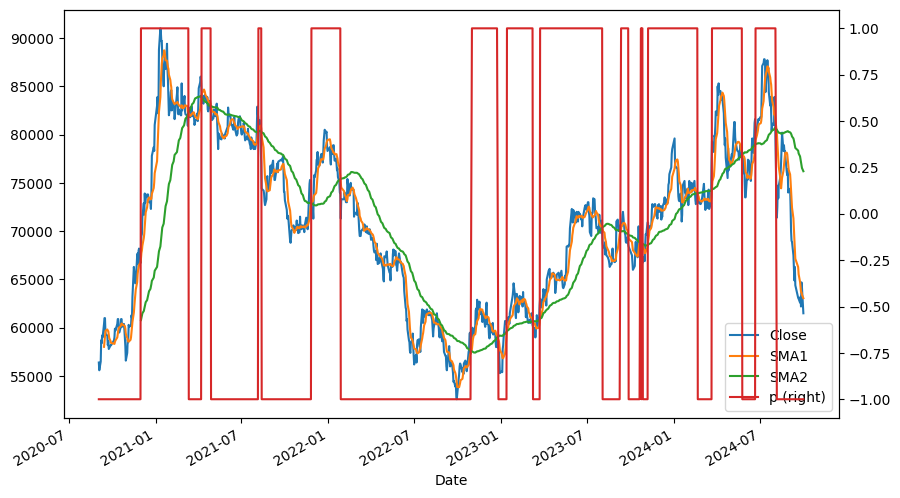

In [105]:
df1.plot(figsize=(10, 6), secondary_y='p');

In [108]:
df1['r'] = np.log(df1.Close / df1.Close.shift(1))   # 로그수익률 계산

In [109]:
# 성과측정

df1['s'] = df1['p'] * df1['r']     # 전략의 수익률 계산
df1[['r', 's']].sum().apply(np.exp)  # 성과 계산
df1[['r', 's']].sum().apply(np.exp) - 1  # 순수성과 계산 

r    0.090426
s    0.413809
dtype: float64

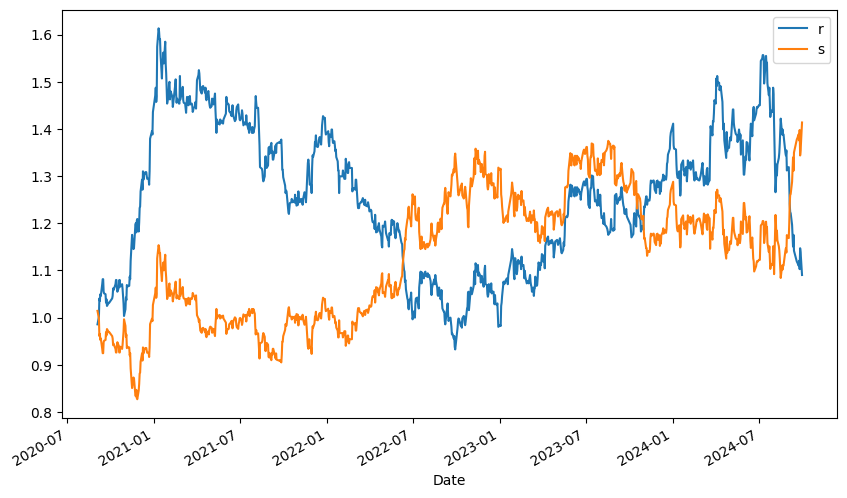

In [110]:
df1[['r', 's']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [113]:
# 매매횟수 및 거래비용 고려

sum(df1['p'].diff() != 0) + 2    # 매매횟수 계산

29

In [114]:
pc = 0.005  # 거래비용(비율)

df1['s_'] = np.where(df1['p'].diff() != 0,
                      df1['s'] - pc, df1['s'])   # 매매전략에서 거래비용 조정

df1['s_'].iloc[0] -= pc        #  매매전략에서 진입매매 조정

df1['s_'].iloc[-1] -= pc       # 매매전략에서 엑시트 매매 조정


C:\Users\wonee\AppData\Local\Temp\ipykernel_5684\3743006923.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1['s_'].iloc[0] -= pc        #  매매전략에서 진입매매 조정
C:\Users\wonee\AppData\Local\Temp\ipykernel_5684\3743006923.py:6: SettingWithCop

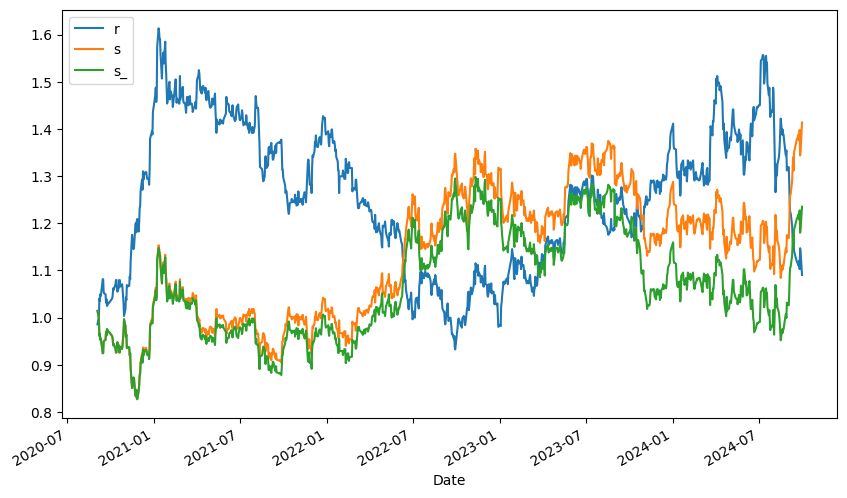

In [115]:
# 매매성과 

df1[['r', 's', 's_']][df1['p'].diff() != 0]   # 조정된 매매성과 

df1[['r', 's', 's_']].sum().apply(np.exp)

df1[['r', 's', 's_']].sum().apply(np.exp) - 1

df1[['r', 's', 's_']].cumsum().apply(np.exp).plot(figsize=(10, 6));

# df1.to_excel('기술지표검증1.xlsx')